> Copyright 2022 DeepMind Technologies Limited.
>
> Licensed under the Apache License, Version 2.0 (the "License");
> you may not use this file except in compliance with the License.
>
> You may obtain a copy of the License at
> https://www.apache.org/licenses/LICENSE-2.0
>
> Unless required by applicable law or agreed to in writing, software
> distributed under the License is distributed on an "AS IS" BASIS,
> WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
> See the License for the specific language governing permissions and
> limitations under the License.

# **Introduction to Python and NumPy for Deep Learning**

All the code examples and tutorials provided in this repository use the [Python](https://www.python.org/) programming language and heavily rely on the [NumPy](https://numpy.org/) package for scientific computing with Python.

### **What does this introduction cover?**

This colab should be seen as a reference resource for Python and NumPy that covers foundational topics used in other educational colabs in this repository.

This colab should help you with questions like:

* What library can I use for debugging in Python?
* What are these libraries and packages that come up in the other colabs, such as `functools`, `dataclasses` and `re`?
* How can I use NumPy to do my data transformations, such as reshaping arrays and accessing specific slices of elements?

This colab is not intended to be an exhaustive resource for teaching either Python or NumPy. For more details not covered here, we recommend checking the additional resources listed throughout the colab.

## Before getting started...

If you're not familiar with using Colabs, please check out this [quick tutorial](https://www.youtube.com/watch?v=inN8seMm7UI) and [intro notebook](https://colab.sandbox.google.com/notebooks/intro.ipynb).

This material assumes you're already familiar with programming. In case you are not, you can check these great resources:

* [Introduction to Programming and Computer Science - Full Course @ freeCodeCamp.org](https://www.youtube.com/watch?v=zOjov-2OZ0E)
* [Code Yourself! An Introduction to Programming @ Coursera](https://www.coursera.org/learn/intro-programming)
* [Introductory Programming Courses @ MITOpenCourseware](https://ocw.mit.edu/courses/intro-programming/)
* [Online Programming Courses @ Harvard Online Courses](https://online-learning.harvard.edu/subject/programming)

### Python Version

For this series of colabs, we use Python 3.7. Make sure to check that your environment is using a Python version >= 3.7:

In [ ]:
import sys  # https://docs.python.org/3/library/sys.html

# Let's check which version of Python we're using.
print('Python version:')
print(sys.version)

Python version:
3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


# Part I: Introduction to Python



### About the Python Language

[Python](https://www.python.org/) is a  **interpreted** (1), **high-level** (2), and **dynamically-typed** (3) programming language.

Let's break down what we mean by this:



#### 1. Python is an **interpreted** language.

This means that there's no compilation step to execute Python code – the code is transformed into machine instructions during execution by a Python interpreter.





#### 2. Python is **high-level**.

Python offers many abstractions that make it easy for programmers to code programs without having to understand all the mechanisms underneath that allow the code to actually execute. In fact, reading Python is very similar to reading pseudo-code or even natural language.

For example, here is the pseudo-code for bubble sort:

```
BubbleSort(Array)
{
    Initialise n = Length of Array
    for i = 1 to n do
        for j = 1 to n-1 do
            if Array[j] > Array[j+1] do
                swap(Array[j], Array[j+1])
            end
        end
    end
}
```

And here is the code in actual Python:

In [ ]:
def bubble_sort(array):
  n = len(array)
  for i in range(n):
    for j in range(n-1):
      if array[j] > array[j+1]:
        array[j], array[j+1] = array[j+1], array[j]
  return array

# Checking if the sorting algorithm works as expected.
assert bubble_sort([1, 2, 5, 0, 12, 8, 5]) == [0, 1, 2, 5, 5, 8, 12]
assert bubble_sort(
    [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]) == [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
assert bubble_sort([0]) == [0]
assert bubble_sort([100, 500, -1, 0]) == [-1, 0, 100, 500]

The fact that Python is high-level makes it quite readable (compared to other programming languages, for example C++ or Java) - we hope you agree! :) 

#### 3. Python is **dynamically-typed**

This means that the type of a variable (e.g. whether it's an integer or string) is checked during runtime, so we don't need to specify the variable type when defining it:


In [ ]:
var = 1   # Here, `var` is an int, but we don't need to explicitly state that.
var + 10  # Since `var` is an int, we can perform mathematical operations on it.

11

We could also make `var` be a string (again, without declaring the type beforehand):

In [ ]:
var = 'hello'
var.upper()  # We can use the string method upper().

'HELLO'

## Producing outputs


We can write a message on the user's screen with the `print` function.

In [ ]:
print('Hello Machine Learning World!')

Hello Machine Learning World!


We can use the colab **form** field to parameterise some code (i.e. expect an input from the user, and change the code behaviour accordingly):

In [ ]:
name = "World" # @param {type:"string"}

print('Hello', name)

Hello World


It's common to format a printed message printed in a more customised manner by using **f-strings** to intersperse raw strings with Python variables or code. F-strings are easy to use: they are in quotes like normal strings, but they start with `f` and contain code elements within squiggly brackets `{}`:

For example:

In [ ]:
name = "Alan" # @param {type:"string"}
last_name = "Turing"  # @param {type:"string"}
birth_year = 1912 # @param {type:"integer"}

print(f'Hello {name}, good to see you here!')
print(f'How are you, {name + " " + last_name}?')
print(f'I hear you were born in {birth_year}!')

Hello Alan, good to see you here!
How are you, Alan Turing?
I hear you were born in 1912!


For more about string formatting, check out [this resource](https://docs.python.org/3/tutorial/inputoutput.html).

## Common Python Types and How to Manipulate Them

Here, we define the most common Python types – from simpler types such as numbers, strings and booleans, to more complex container types such as lists, tuples and dictionaries.

### Numbers

Python supports three basic number types: **integers**, **floating point** numbers (or **floats**) and **complex numbers**. Here, we'll take a look at integers and floating point numbers.

#### Types of Numbers

In [ ]:
num_1 = 1
# Note that \t is a character that prints a "tab key", a special character
# often used to create nicely aligned output (see the output of this cell).
print(num_1, '\t\t', 'type num_1:', type(num_1))

num_2 = 1.0
print(num_2, '\t\t', 'type num_2:', type(num_2))

# Scientific notation using e<number> facilitates reading very large
# or very small numbers.
num_3 = 1e6
print(num_3, '\t', 'type num_3:', type(num_3))
num_4 = -2.5e7
print(num_4, '\t', 'type num_4:', type(num_4))
num_5 = -3.14e-4
print(num_5, '\t', 'type num_5:', type(num_5))

# Underscore notation using _ facilitates reading very large numbers.
num_6 = 14_000_000
print(num_6, '\t', 'type num_6:', type(num_6))

1 		 type num_1: <class 'int'>
1.0 		 type num_2: <class 'float'>
1000000.0 	 type num_3: <class 'float'>
-25000000.0 	 type num_4: <class 'float'>
-0.000314 	 type num_5: <class 'float'>
14000000 	 type num_6: <class 'int'>


You can mix integers and floats in operations:

In [ ]:
# Sum of int type + float type = float type.
print(f'num_1: {num_1}\nnum_2: {num_2}')
print(f'sum of num_1 and num_2 is {num_1 + num_2} '
      f'which is type {type(num_1 + num_2)}')

num_1: 1
num_2: 1.0
sum of num_1 and num_2 is 2.0 which is type <class 'float'>


Python supports arbitrarily large integers – any number that needs more than 32-bits to be encoded will be automatically and transparently handled!

In [ ]:
(2 ** 32 - 1) + 1e9

5294967295.0

#### Mathematical Operations on Numbers

In [ ]:
num_1 = 20  # @param
num_2 = 3   # @param

# Sum.
print(f'Sum\t\t{num_1} + {num_2} =', num_1 + num_2)

# Division.
print(f'Division\t{num_1} / {num_2} =', num_1 / num_2)

# Floor division.
print(f'Floor Division\t{num_1} // {num_2} =', num_1 // num_2)

# Modulo (division remainder).
print(f'Modulo\t\t{num_1} % {num_2} =', num_1 % num_2)

# Multiplication.
print(f'Multiplication\t{num_1} * {num_2} =', num_1 * num_2)

# Exponentiation.
print(f'Exponentiation\t{num_1} ** {num_2} =', num_1 ** num_2)

# Negative.
print(f'Negated value\t-({num_1}) =', -num_1)

# Absolute value.
print(f'Absolute value\tabs({-num_1}) =', abs(-num_1))

Sum		20 + 3 = 23
Division	20 / 3 = 6.666666666666667
Floor Division	20 // 3 = 6
Modulo		20 % 3 = 2
Multiplication	20 * 3 = 60
Exponentiation	20 ** 3 = 8000
Negated value	-(20) = -20
Absolute value	abs(-20) = 20


#### Mathematical Expressions

In the examples above, we only did operations between two numbers. But what happens if we have an expression with more numbers? For example:

`3 + 5 * 10`

Should we first add 10 to 11 or multiply 11 to 10? For this, we need to define **operator precedence**. As in mathematics, in Python multiplication is granted a higher precedence than addition.

Check out [this resource](https://docs.python.org/3/reference/expressions.html#operator-precedence) for more information on operator precedence.

By default, running the expression above produces the following output:

In [ ]:
3 + 5 * 10

53

In order to explicitly express which subexpressions we would like to have higher precedence, we can add brackets `()`:

In [ ]:
(3 + 5) * 10

80

### Strings


Python has a lot of facilities to manipulate strings. Check out [these docs]( https://docs.python.org/3.4/library/string.html) for more examples.

Here is a non-exhaustive list of cool things we can do with strings:

In [ ]:
# We can check the length of a string.
str_1 = 'abc'
print(f'String "{str_1}" has length', len(str_1))

String "abc" has length 3


In [ ]:
# We can get a specific letter from the string using indexing.
print(f'First letter of string "{str_1}" is {str_1[0]}')
print(f'Second letter of string "{str_1}" is {str_1[1]}')
print(f'Third letter of string "{str_1}" is {str_1[2]}')

First letter of string "abc" is a
Second letter of string "abc" is b
Third letter of string "abc" is c


In [ ]:
# Concatenate strings!
str_2 = 'def'
str_1 + ' ' + str_2

'abc def'

In [ ]:
# Repeat a string many times.
print(str_1, str_1 * 10)

abc abcabcabcabcabcabcabcabcabcabc


**Important: Strings in Python are immutable!**
Meaning, as opposed to some languages, you cannot change a value of a character in a string without creating a new string.

In [ ]:
str_1 = 'abc'
# We can't assign a new value to a character in a string!
str_1[0] = '2'  # TypeError: 'str' object does not support item assignment

TypeError: ignored

What you observe above is called an **exception**. An exception is an error in execution, which in this case occurs because a string does not support item assignment. We will not go into the details of exceptions and exception handling (which is writing Python programs such that they can catch errors and change their behaviour based on the error). For more details on errors, please check the Python documentation [here](https://docs.python.org/3/tutorial/errors.html).

### Booleans

Booleans represent the logical values 1 (`True`) or 0 (`False`).

In [ ]:
bool_a = True
bool_b = False

Let's get familiar with some operations involving boolean variables:

In [ ]:
print(f'OR \t {bool_a} OR {bool_b} =', bool_a or bool_b)
print(f'AND \t {bool_a} AND {bool_b} =', bool_a and bool_b)
print(f'NOT \t NOT {bool_a} =', not bool_a)
print(f'XOR \t {bool_a} XOR {bool_b} =', bool_a ^ bool_b)  # Exclusive OR.

OR 	 True OR False = True
AND 	 True AND False = False
NOT 	 NOT True = False
XOR 	 True XOR False = True


### Containers

Containers are capable of storing many values in a single place. Python has many different containers. Here, we'll talk about the most common ones:

* Lists
* Tuples
* Dictionaries




#### Lists

Lists are similar to arrays in other programming languages but are **dynamic**, which means that they can increase in size:

In [ ]:
my_list = []       # Define a list.
my_list.append(1)  # Add an element to a list.
print(my_list, '\n')

my_list.extend([1, 2, 3])  # Extend a list with another list.
print(my_list)
print(len(my_list), '\n')  # Get the number of values in the list.

# We can access values by index.
print(my_list[2], '\n')

my_list[0] = 1000  # Change value of first element in list.
print(len(my_list), '\n')

# The add operation concatenates lists!
print(my_list + my_list, '\n')

# We can sort a list.
print(sorted(my_list), '\n')

my_list.remove(2)   # Removes the first occurrence of a value.
print(my_list, '\n')

[1] 

[1, 1, 2, 3]
4 

2 

4 

[1000, 1, 2, 3, 1000, 1, 2, 3] 

[1, 2, 3, 1000] 

[1000, 1, 3] 



#### Matrices

We can represent a matrix in Python by having a list of lists where all the inner lists have the same length:


![picture](https://storage.googleapis.com/dm-educational/assets/intro-to-python-and-numpy/indexing_2d.svg)


In [ ]:
matrix = [
          [1, 2, 3],
          [4, 5, 6],
          [7, 8, 9],
          [10, 11, 12],
          ]

# Get a specific element.
print(matrix[0][2])  # Get the element at the first row, third column.
print(matrix[1][1])  # Get the element at the second row, second column.

print('Number of rows', len(matrix))
print('Number of columns', len(matrix[0]))

3
5
Number of rows 4
Number of columns 3


**Note that a list of lists is not necessarily a matrix**, since the inner lists can have a different number of elements implying on an inconsistent number of columns!!

In [ ]:
# Valid list of lists but this is not a matrix.
list_of_lists = [
                 [1],
                 [4, 5, 6],
                 [7, 8, 9],
                 [11, 12]
                 ]

In practice, in machine learning we nearly always use **NumPy arrays** to store and manipulate matrices of numbers (see NumPy sections below).

#### Tuples

Tuples are similar to lists but are **immutable**.

In [ ]:
my_tuple = (1, 2, 3)  # Create a tuple.
print(my_tuple)

# Access its values using indices.
print(my_tuple[0])
print(my_tuple[1])
print(my_tuple[2])

# Access its values by unpacking (assigning variables for each tuple value).
a, b, c = my_tuple
print(a, b, c)

print(my_tuple + (4,))  # We can concatenate tuples.

(1, 2, 3)
1
2
3
1 2 3
(1, 2, 3, 4)


Notice that `(4)` is not a tuple – it is a number between brackets, but `(4,`) is a tuple of length 1!

In [ ]:
type((4))

int

In [ ]:
x = (4)
x

4

In [ ]:
type((4,))

tuple

#### Dictionaries

Dictionaries (also called maps or associative arrays in other languages) associate two types of elements to each other: `keys` and `values`.

In [ ]:
my_dict = {}    # Create an empty dictionary.
my_dict['num_fruit'] = 5  # Associates the key 'num_fruit' to the value 5.
print(my_dict)

{'num_fruit': 5}


`keys` are unique, so a dictionary  can't have multiple multiple values associated with a given `key`:

In [ ]:
# Update the value of key 'num_fruit' to be associated with the value 2.
my_dict['num_fruit'] = 2
print(my_dict)

{'num_fruit': 2}


In [ ]:
# We can also update a dictionary using `update()`.
my_dict.update({'num_fruit': 10,
                'origin': 'Brazil'})
my_dict

{'num_fruit': 10, 'origin': 'Brazil'}

In [ ]:
print(my_dict['num_fruit'])  # Access a specific value by keying in.

10


In [ ]:
# We'll see a KeyError if we try to access a key that is not on the dict.
my_dict['ripe']  # KeyError: 'ripe'

KeyError: ignored

In [ ]:
# We can check if a key is in the dict before trying to get its value.
print('ripe' in my_dict)
print('origin' in my_dict)

False
True


We can also create a dictionary with prepopulated keys and values.

In [ ]:
my_dict = {
    'num_fruit': 10,
    'origin': 'Brazil',
    'ripe': True
}

print(my_dict)
print(my_dict['ripe'])

{'num_fruit': 10, 'origin': 'Brazil', 'ripe': True}
True


In [ ]:
print(my_dict.keys())    # Get only the keys.
print(my_dict.values())  # Get only the values.
print(my_dict.items())   # Get both keys and values as a tuple!

dict_keys(['num_fruit', 'origin', 'ripe'])
dict_values([10, 'Brazil', True])
dict_items([('num_fruit', 10), ('origin', 'Brazil'), ('ripe', True)])


In machine learning, we can use dictionaries to for example map strings to numbers. Machine learning models generally don't understand strings, so when dealing with text data, it is very common to map each string to a numerical value:

In [ ]:
my_strings = ['I', 'love', 'ML', '<3', '<3', '<3', '!']

str_to_int = {
    'I': 1,
    'love': 2,
    'ML': 3,
    '<3': 4,
    }

print(str_to_int['I'])
print(str_to_int[my_strings[2]])
print('!' in str_to_int)

1
3
False


## Conditions

In Python, we can check for conditions using `if`, `elif` and `else`.

As we saw before, it is a good idea to check if the key is present before trying to access its value. Here is a common usage pattern using `if` to accomplish this:

In [ ]:
# Check if the key is in dict.
key = 'love'  #@param

print(key in str_to_int)

if key in str_to_int:
  print(f'The value for {key} is {str_to_int[key]}')
else:
  print(f'{key} is not in the dictionary')

True
The value for love is 2


We can also use `elif` to check multiple conditions. For example:

In [ ]:
num_1 = 47  #@param {type:"slider", min:0, max:100, step:1}
num_2 = 11  #@param {type:"slider", min:0, max:100, step:1}

if num_1 > num_2:
  print(f'{num_1} is bigger than {num_2}')
elif num_1 < num_2:
  print(f'{num_1} is smaller than {num_2}')
# We could have more elif blocks here...
else:
  print(f'{num_1} is equal to {num_2}')

47 is bigger than 11


### Comparisons

The `>` (greater than) and `<` (less than) operators used above are just some of the comparison operators that Python supports. For more information, [check out this resource](https://docs.python.org/3/library/stdtypes.html#comparisons).

Some additional examples to peruse:

In [ ]:
print(10 > 6)   # True: 10 is larger than 6.
print(6 > 6)    # False: 6 is not larger than 6.
print(10 >= 6)  # True: 10 is larger or equal to 6.
print(6 >= 6)   # True: 6 is larger or equal to 6.

True
False
True
True


In [ ]:
print(10 < 5)   # False: 10 is not less than 5.
print(10 == 5)  # False: 10 is not equal to 5.
print(10 != 5)  # True: 10 is different than 5.

False
False
True


In [ ]:
print('abc' == 'foo')  # False: abc is not equal to foo.
print('abc' < 'foo')   # True: abc is alphabetically before foo.
print('abc' < 'abcz')  # True: abc is alphabetically before abcz.
print('abc' == 1)      # False: abc is not equal to 1.

False
True
True
False


In [ ]:
# Not a valid operation! How could we compare a string to an int?
# print('abc' < 1)  # TypeError: '<' not supported between instances of 'str' and 'int'

## Loops

Loops are very useful when we want to execute the same computation many times without repeating our code. For example, let's say we want to print "Hello World" 5 times. We could copy and paste our code 5 times:

In [ ]:
print('Hello World')
print('Hello World')
print('Hello World')
print('Hello World')
print('Hello World')

Hello World
Hello World
Hello World
Hello World
Hello World


Or better yet, put the code inside of a loop!

In [ ]:
for i in range(5):  # Iterate 5 times.
  print('Hello World')

Hello World
Hello World
Hello World
Hello World
Hello World


The `for` loop option is preferable because it's more compact and readable.

Another `for` loop example:

In [ ]:
# Print the values between [0, 10).
for i in range(10):
  print(i, end=' ')

0 1 2 3 4 5 6 7 8 9 

Another type of loop is a `while` loop, which will execute until a certain expression is `False` OR until it reaches a `break` clause:

In [ ]:
flag = False
counter = 0
while not flag:
  counter += 1
  print(f'Current value of counter: {counter}')
  if counter > 5:
    print('Flipping the flag to True!')
    flag = True

Current value of counter: 1
Current value of counter: 2
Current value of counter: 3
Current value of counter: 4
Current value of counter: 5
Current value of counter: 6
Flipping the flag to True!


In [ ]:
# The break clause will immediately end the loop as soon as we reach it.
flag = False
counter = 0
while not flag:
  counter += 1
  print(f'Current value of counter: {counter}')
  if counter > 5:
    print('Flipping the flag to True!')
    flag = True
  break

Current value of counter: 1


The `range` function used above facilitates iterating over ranges of values using the following syntax:

`range(start (inclusive), end (not inclusive), increment)`

In [ ]:
for value in range(5, 10, 1):
  print(value)

5
6
7
8
9


In [ ]:
for value in range(10, 20, 2):
  print(value)

10
12
14
16
18


Another common use case for loops is to iterate over elements of containers:

In [ ]:
my_list = [100, 150, 200]

for value in my_list:
  print(value)

100
150
200


We can use `enumerate` to get also the index of the elements:

In [ ]:
for index, value in enumerate(my_list):
  print(index, value)

0 100
1 150
2 200


Let's try iterating over keys and values in a dictionary:

In [ ]:
my_dict = {1: 'a', 2: 'b', 3: 'c'}

# If we iterate on a dict, we get its keys.
for key in my_dict:
  print(key, my_dict[key])

1 a
2 b
3 c


A more elegant way to iterate over the `(key, value)` tuples in a dictionary is by using `items()`:

In [ ]:
for key, value in my_dict.items():
  print(key, value)

1 a
2 b
3 c


## Functions

Let's say we want to add two numbers then print the result in a nice message, and let's say we have many different pairs of numbers we want to add.

We could accomplish this by copy-pasting our code:

In [ ]:
a = 10
b = 12
print(f'The sum of {a} + {b} is {a + b}')
c = 1.3
d = -1
print(f'The sum of {c} + {d} is {c + d}')
e = 1e7
f = 2e-6
print(f'The sum of {e} + {f} is {e + f}')

The sum of 10 + 12 is 22
The sum of 1.3 + -1 is 0.30000000000000004
The sum of 10000000.0 + 2e-06 is 10000000.000002


But a more compact, readable, and maintanable solution would be to implement a **function** that does exactly this and expects two numbers as input:

In [ ]:
def print_sum(num_1, num_2):
  print(f'The sum of {num_1} + {num_2} is {num_1 + num_2}')

print_sum(a, b)
print_sum(c, d)
print_sum(e, f)

The sum of 10 + 12 is 22
The sum of 1.3 + -1 is 0.30000000000000004
The sum of 10000000.0 + 2e-06 is 10000000.000002


## Classes and Objects

Python is an **Object Oriented** language. As the [Python docs](https://docs.python.org/3/reference/datamodel.html) state:

> Objects are Python’s abstraction for data. All data in a Python program is represented by objects or by relations between objects.

Below is how you create a class in Python.


In [ ]:
class PrintMessage:
  """A simple example class."""

  # Init method initialises attributes.
  def __init__(self, message):
    self.message = message

  def print_message(self):
    print(self.message)

In [ ]:
obj = PrintMessage('Hello World')     # Instantiate an object.
obj.print_message()                   # Execute method.

Hello World


In [ ]:
print(type(obj))                      # Check the type of object.
print(isinstance(obj, PrintMessage))  # Check if object is instance of PrintMessage.

<class '__main__.PrintMessage'>
True


An important concept in object-oriented programming is that of **inheritance**, which is helpful for code re-use and for organising hierarchical relationships between objects. The main concept is that **child classes** can inherit functionality from **parent classes**:

In [ ]:
# By adding the `PrintMessage` class between brackets when defining a new
# class, the ChildClass will inherit from it.
class ChildClass(PrintMessage):

  name = 'abc'  # Let's add a new attribute to the class.

  # Let's add a new method to the class.
  def abs_value(self, a):
    super().print_message()  # We can access the parent's methods with super.
    return abs(a)

In [ ]:
obj = ChildClass('Hello World')  # Instantiate an object.
print(type(obj))  # Check type of object.

<class '__main__.ChildClass'>


The object is both of type `ChildClass` and `PrintMessage`:

In [ ]:
print(isinstance(obj, PrintMessage))  # Check if object is instance of PrintMessage.
print(isinstance(obj, ChildClass))  # Check if object is instance of ChildClass.

True
True


We can use both the `abs_value` defined in the `ChildClass` class, and the `print_message` method defined in the parent class we inherited from:

In [ ]:
obj.abs_value(-1)  # Method defined in ChildClass.

Hello World


1

In [ ]:
obj.print_message()  # Method defined in the parent class PrintMessage.

Hello World


**Important**: Python allows **multiple inheritance**! This is when a class inherits from multiple parent classes:

In [ ]:
# Illustrative example of multiple inheritance.
class ParentClass1:
  pass

class ParentClass2:
  pass

class ChildClass(ParentClass1, ParentClass2):
  pass

obj = ChildClass()

print(isinstance(obj, ParentClass1))
print(isinstance(obj, ParentClass2))

True
True



For more information on classes in Python, check out [this resource](https://docs.python.org/3/tutorial/classes.html).

## Suggested Exercises

1. What does `11 % 3` mean, and what will it evaluate to?
2. What does `True ^ False` mean, and what will it evaluate to?
3. What will the following expression evaluate to?: `(1 + 2) * -1 * (3 + 4 * 2)`

4. What do you think the following code block will print?
```python
for value in range(8, 3, -1):
     print(value)
```
5. **Challenge Problem**: due to a food transportation logistics issue, we will lose half of our already ripe fruit. How can we update the following fruit dicts to reflect this scenario?

```python
fruit_dict_1 = {
    'num_fruit': 10,
    'origin': 'Brazil',
    'ripe': True,
}

fruit_dict_2 = {
    'num_fruit': 7,
    'origin': 'California',
    'ripe': False,
}

# Write your code to update `num_fruit` in these dicts based on ripeness.
```


<details>   )
  <summary>Click here to see the <font color="red"><b>Exercise Solutions</b></font> (but no peeking before you try!)</summary>

1. This is the modulo operator, which will return the remainder of the division (in this case, 2).
2. This is the exclusive or (XOR) operator. The expression will evaluate to `True`, because exactly one of the two elements is `True`.
3. -33
4. The `-1` means we will go down by 1 at each step, starting from 8 (inclusive) and ending at 4 (exclusive).
5. You could do something like the following:
``` python
# Iterating over a list of dicts.
for fruit_dict in [fruit_dict_1, fruit_dict_2]:
      if fruit_dict['ripe']:  # Equivalent to if fruit_dict['ripe'] == True.
        # Use floor division since partially rotten fruit is maybe also lost.
        fruit_dict['num_fruit'] = fruit_dict['num_fruit'] // 2
```
</details>


##  Useful things to know!

Now that we're comfortable with the basics of Python, we can introduce some additional useful tools that you will see repeatedly in machine learning code, starting with indexing and slicing:

### Indexing & Slicing


Indexing and slicing are extremely useful ways of extracting elements from index-based collections.

Indexing accesses elements, whereas slicing extracts a sequence of elements. Consider the following list of lists (which is a matrix of integers, containing 3 rows and 4 columns):



In [ ]:
a = [
     [1, 2, 3, 4],
     [5, 6, 7, 8],
     [9, 10, 11, 12],
     ]

We can access various elements and slices of this matrix as follows:



![picture](https://storage.googleapis.com/dm-educational/assets/intro-to-python-and-numpy/indexing_2d.svg)

In [ ]:
print(matrix[1][2])  # Access element in row index 1 and column index 2.
print(matrix[:][2])  # Access elements in any row but column index 2.
print(matrix[1][1:3])  # Access elements in row index 1, and column indices 1 and 2.

6
[7, 8, 9]
[5, 6]


#### Indexing Tips

**Note that indexing in Python is zero-based**: [0 denotes the first element](https://en.wikipedia.org/wiki/Zero-based_numbering). This is a bit of a gotcha that catches people off guard. This zero-based indexing is in contrast to some other programming languages like R, in which index numbering starts at 1. People like to have very spirited arguments about which approach is correct/better! ;)

Also note that indexing is always integer-based (since passing in floats wouldn't make much sense - what's the 3.7th element in a list?). You can index into various Python containers in a similar manner:

* `matrix[i][j]`
* `list[i]`
* `tuple[i]`
* `str[i]`

#### Slicing Tips

Slicing syntax can be a bit tricky if you are not used to it – slicing in Python is achieved with the `start:stop:step` notation, which denotes:
- Where a slice should start (inclusive) by the `start` position
- Where the slice should stop by the `stop` position (**not inclusive!** i.e. exclusive)
- And what the step size should be along the way by `step` (which is by default 1 if it is not specified)

For example:
- `:` means the full slice
- `1:` means slice from the 2nd element onwards (remember zero-based indexing/slicing!)
- `:-1` means slice until the last element (not inclusive; so effectively, this drops the final element).
- `1:3` means slice including the second and third elements (the fourth element at index 3 is NOT included).
- `::2` means to slice all positions, but take every other element (every 2nd element).


One thing to note here: we can do the same with for/while loops and ifs, however it is MUCH more efficient to do this via the built-in mechanisms.



Let's play around with some examples of indexing and slicing using our matrix `a`:

In [ ]:
a = [
     [1, 2, 3, 4],
     [5, 6, 7, 8],
     [9, 10, 11, 12],
     ]

print(a[1])     # 2nd row.
print(a[1][:])  # The same as above (colon = full slice).

[5, 6, 7, 8]
[5, 6, 7, 8]


Let's get slightly trickier:

In [ ]:
print(a[1][1:])   # Get elements in 2nd row, from the 2nd column until the end.
print(a[1][:-1])  # Get elements in 2nd row, until the last column (not inclusive).

[6, 7, 8]
[5, 6, 7]


We can use indexing and slicing for modification too:

In [ ]:
a = [[1, 2, 3, 4],
     [5, 6, 7, 8],
     [9, 10, 11, 12]]
print('Before the modification:', a, '\n')

# Modify the first element.
a[0][0] = 100
print('After the modification:', a)

Before the modification: [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]] 

After the modification: [[100, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]


Be careful with assignment while slicing, since a slice (e.g. `a[:]`) creates a **copy of the referred inner object**! This means that you might think you're updating the values in a slice, but actually nothing changes.

Some examples to illustrate:

In [ ]:
a = [[1, 2, 3, 4],
     [5, 6, 7, 8],
     [9, 10, 11, 12]]
print('Before modification:', a, '\n')

# Try to replace some values with 500.
a[1:3][1] = 500  # a[:] returns a copy so `a` is not modified!
print('After attempted modification:', a, '\n')

a[0][2] = 500  # But a[index][:] will work. Think about why...
print('After successful modification:', a, '\n')

# We can also substitute the entire list.
a[1][:] = [1, 2]  # This is the same as `a[1] = [1, 2]`.
print('After another modification:', a, '\n')

Before modification: [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]] 

After attempted modification: [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]] 

After successful modification: [[1, 2, 500, 4], [5, 6, 7, 8], [9, 10, 11, 12]] 

After another modification: [[1, 2, 500, 4], [1, 2], [9, 10, 11, 12]] 



### List comprehensions

**List comprehensions** are a very common construct in Python. They are very helpful for writing more concise code when manipulating lists and other container objects, and are particularly useful when we either want to slightly modify a container or filter elements based on a condition.

From the [Python documentation](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions):
> "List comprehension consists of brackets containing an expression followed by a for clause, then zero or more for or if clauses. The result will be a new list resulting from evaluating the expression in the context of the for and if clauses which follow it."

For example, let's say we have a list of ints `list_a` and we would like a new list `list_a_plus_10` with each value in `list_a` increased by 10. How would you do this?

In [ ]:
list_a = [10, 4, 3, 2, 5, 9, 0]

# Boring solution...
list_a_plus_10 = []
for value in list_a:
  list_a_plus_10.append(value + 10)

print(list_a)
print(list_a_plus_10)

[10, 4, 3, 2, 5, 9, 0]
[20, 14, 13, 12, 15, 19, 10]


This works, but let's use a list comprehension instead:

In [ ]:
# Cool solution using a list comprehension.
list_a_plus_10 = [value + 10 for value in list_a]
print(list_a)
print(list_a_plus_10)

[10, 4, 3, 2, 5, 9, 0]
[20, 14, 13, 12, 15, 19, 10]


Now let's say we want a new list `odds_a_plus_10` with each value in `list_a` added by 10 but only if the number is odd, otherwise we should not include it in the list. How would you do this?

In [ ]:
list_a = [10, 4, 3, 2, 5, 9, 0]

# Boring solution...
odds_a_plus_10 = []
for value in list_a:
  if value % 2 == 1:
    odds_a_plus_10.append(value + 10)

print(list_a)
print(odds_a_plus_10)

[10, 4, 3, 2, 5, 9, 0]
[13, 15, 19]


In [ ]:
# Cool solution using a list comprehension.
odds_a_plus_10 = [value + 10 for value in list_a if value % 2 == 1]
print(list_a)
print(odds_a_plus_10)

[10, 4, 3, 2, 5, 9, 0]
[13, 15, 19]


That's significantly more concise and readable! :) List comprehensions are also often faster than `for` loops.

### Iterators

Iterators in Python are objects used to iterate on containers.

Iterators have the following methods:

* `__iter__`: used for initialisation.

* `__next__`: gets the next element for iteration. Raises a `StopIteration` error when there are no more elements left to grab.


Iterators are very useful in machine learning since we usually have a dataset we want to iterate on. So, we can create an iterator and explicitly ask for more examples:


In [ ]:
class MyDatasetIterator:

  def __init__(self, dataset):
    self.dataset = dataset
    self.counter = 0
    self.limit = len(self.dataset)

  def __iter__(self):
    return self

  def __next__(self):
    if self.counter >= self.limit:
      raise StopIteration

    curr_value = self.dataset[self.counter]
    self.counter += 1
    return curr_value

In [ ]:
it = MyDatasetIterator([1, 3, 10, 4])

while True:
  # We can ask for an element using next.
  try:
    print(next(it))
  except StopIteration:
    break

1
3
10
4


We can also iterate on iterators using a `for` loop instead of `next`. Not surprising, right?


In [ ]:
it = MyDatasetIterator([1, 3, 10, 4])

for value in it:
  print(value)

1
3
10
4


What would happen if we now try to iterate on `it` again, after we exhausted all the values?

In [ ]:
for value in it:
  print(value)

Nothing! Think about why. Hint: try running `list(it)`.


### Regex

Regular expressions (regex) are expressions that allow you to match or replace parts of strings in a flexible way. The Python module that provides regular expression operations is called `re`. For more information, check out [these docs](https://docs.python.org/3.4/library/re.html).

Here, we'll just run through a few quick use cases that are commonly encountered:

In [ ]:
import re

# Compile a pattern.
# [a-z]+ means to match any lowercase letter occurring one or more times.
pattern = re.compile("[a-z]+")

# Check what strings match a pattern.
print(pattern.match(""))     # If the string is not a match, it returns None.
print(pattern.match("123"))  # If the string is not a match, it returns None.
print(pattern.match("ABC"))  # If the string is not a match, it returns None.
print(pattern.match("abc"))  # If there's a match, it returns a Match object.

None
None
None
<re.Match object; span=(0, 3), match='abc'>


`search` returns a corresponding `Match` object instance:


In [ ]:
print(pattern.search("123 abc def 45 123"))

<re.Match object; span=(4, 7), match='abc'>


`findall` returns all strings that match the pattern:


In [ ]:
print(pattern.findall("123 abc def 45 123"))

['abc', 'def']


`finditer` returns an iterator of `Match` objects:

In [ ]:
it = pattern.finditer("123 abc def 45 123")
for match in it:
  print(match)

<re.Match object; span=(4, 7), match='abc'>
<re.Match object; span=(8, 11), match='def'>


### Functools

Functools is a library that facilitates creating new functions based on existing ones.

From the [documentation](
https://docs.python.org/3.7/library/functools.html):

> "The functools module is for higher-order functions: functions that act on or return other functions. In general, any callable object can be treated as a function for the purposes of this module."

In [ ]:
import functools

# Let's define a function. Nothing new here.
def print_power(base, exponent):
  print(f'{base} ** {exponent} = {base ** exponent}')
print_power(base=2, exponent=3)

2 ** 3 = 8


Using `functools.partial`, we can create a new function with default arguments, whose output is a new function with a simplified signature:

In [ ]:
print_power_exponent_3 = functools.partial(print_power, exponent=3)
# Returns a function.
print(type(print_power_exponent_3))
print("Is this new function callable?", callable(print_power_exponent_3))
print_power_exponent_3(base=1)
print_power_exponent_3(base=2)
print_power_exponent_3(base=3)

<class 'functools.partial'>
Is this new function callable? True
1 ** 3 = 1
2 ** 3 = 8
3 ** 3 = 27


We could set the `base` argument to a fixed value instead:

In [ ]:
print_power_base_2 = functools.partial(print_power, base=2)
print_power_base_2(exponent=4)
print_power_base_2(exponent=5)
print_power_base_2(exponent=6)

2 ** 4 = 16
2 ** 5 = 32
2 ** 6 = 64


We could even pre-specify the values for all arguments in a function:

In [ ]:
# By default: base = 2, exponent = 10.
print_fixed_power = functools.partial(print_power, base=2, exponent=10)
print_fixed_power()

2 ** 10 = 1024


Though note that we can still pass different values for the arguments if we'd like:


In [ ]:
print_fixed_power(exponent=4, base=5)

5 ** 4 = 625


## Type annotation

Python is **dynamically-typed**, so we do not need to prespecify the types of variables or what type of return we should expect from a function. However, Python does offer the ability to optionally supply this information (this is called "**type hinting**", "type annotation", or simply "typing"). Type annotation can be helpful for:

*  **Documenting your code** and making it easier for others to read and work with. With type annotations, it's immediately clear to everyone what a function's inputs and outputs are.
* **Helping you write better code** by forcing you to think about the types involved.
* **Catching certain errors**, especially if you're using a linter or building your code.

Let's first write a simple function:

In [ ]:
def repeat_string(string, num_repeats):
  return string * num_repeats

In [ ]:
repeat_string('hello', 3)

'hellohellohello'

And let's add type annotation, to specify the types of each input argument, and the type of the function output:

In [ ]:
def repeat_string(string: str, num_repeats: int) -> str:
  return string * num_repeats

Finally, we can add a **docstring** to complete our function documentation:

In [ ]:
def repeat_string(string: str, num_repeats: int) -> str:
  """Repeats a string a certain number of times.

  Args:
    string: string to be repeated.
    num_repeats: number of repeats of the string.

  Returns:
    A repeated string.
  """
  return string * num_repeats

Although in this case the function was quite simple and perhaps didn't need this extra documentation, in real code cases it's almost always worth the extra bit of time to type annotate and document your code in this way. Your collaborators will thank you! :)

## Using dataclasses

You are likely to encounter dataclasses when reading machine learning code – as the name might suggest, these are classes which store data, and are helpful for logically grouping multiple variables.

In Python, we can use `@dataclasses.dataclass` to create a simple dataclass. If you're familiar with C++, this is similar to structs.

For example, we might want to write a `Metrics` dataclass to group together some model performance metrics:

In [ ]:
import dataclasses

@dataclasses.dataclass
class Metrics:
  loss: float  # No default value means that loss must always be specified.
  accuracy: float = 0.0
  recall: float = 0.0
  precision: float = 0.0

In [ ]:
metrics = Metrics(loss=1.2, recall=0.1)
metrics

Metrics(loss=1.2, accuracy=0.0, recall=0.1, precision=0.0)

We expect an error if we don't pass in a `loss` value:

In [ ]:
metrics = Metrics(accuracy=0.3)
metrics

TypeError: ignored

### Debugging in Python

#### Help

For checking the documentation of any Python object, you can use the `help` function. For example, to access some more information in integers, you can do:

In [ ]:
help(int)

Help on class int in module builtins:

class int(object)
 |  int([x]) -> integer
 |  int(x, base=10) -> integer
 |  
 |  Convert a number or string to an integer, or return 0 if no arguments
 |  are given.  If x is a number, return x.__int__().  For floating point
 |  numbers, this truncates towards zero.
 |  
 |  If x is not a number or if base is given, then x must be a string,
 |  bytes, or bytearray instance representing an integer literal in the
 |  given base.  The literal can be preceded by '+' or '-' and be surrounded
 |  by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
 |  Base 0 means to interpret the base from the string as an integer literal.
 |  >>> int('0b100', base=0)
 |  4
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __ceil__(...)
 |      Ceiling of

You can even get help on `help`!

In [ ]:
help(help)

Help on _Helper in module _sitebuiltins object:

class _Helper(builtins.object)
 |  Define the builtin 'help'.
 |  
 |  This is a wrapper around pydoc.help that provides a helpful message
 |  when 'help' is typed at the Python interactive prompt.
 |  
 |  Calling help() at the Python prompt starts an interactive help session.
 |  Calling help(thing) prints help for the python object 'thing'.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, *args, **kwds)
 |      Call self as a function.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



#### pdb

Pdb is Python’s interactive code debugger ([more information here](https://docs.python.org/3.7/library/pdb)). It is not unusual to write code that is not working as intended or is breaking for unknown reasons.

For situations like this, we can use `pdb` to stop execution at a specific point (the "breakpoint") and interact with the code aat that exact state of the code (with the specific variable values and function outputs that are present at the breakpoint).

One of the common functionalities used with pdb is `pdb.set_trace()`:

```import pdb; pdb.set_trace()```

We usually `import pdb` and call `pdb.set_trace()` on the same line so that we don't forget to remove the import and trace after we solve the issue with our code.

Below is an example of what we can do with `pdb`:


In [ ]:
x = 1
y = 2
z = 3

def multiply_values(x, y):
  return x*y

for i in range(10):
  x += 2
  import pdb; pdb.set_trace()
  output = multiply_values(x, y) + z


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/bdb.py", line 332, in set_trace
    sys.settrace(self.trace_dispatch)



> <ipython-input-97-e12fd12d27b2>(11)<module>()
-> output = multiply_values(x, y) + z
(Pdb) q



PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/bdb.py", line 357, in set_quit
    sys.settrace(None)



BdbQuit: ignored

### Libraries for visualisation

In deep learning, we interact with a lot of data – for example, the input data, model training curve data, and model predictions.

It is often valuable to be able to quickly visualise this data in order to understand what is going on in it.

The most popular library for visualisation in Python is `matplotlib`, which we introduce here.


#### Matplotlib

Matplotlib is an extremely useful visualisation library for various tasks such as visualising data, checking data patterns, making animations, and visualising images.

From the [matplotlib website](https://matplotlib.org/):

> Matplotlib is a comprehensive library for creating static, animated, and interactive visualisations in Python.


Below are some examples of plots we can make with Matplotlib:

In [ ]:
# This is a common way to import matplotlib.
import matplotlib.pyplot as plt

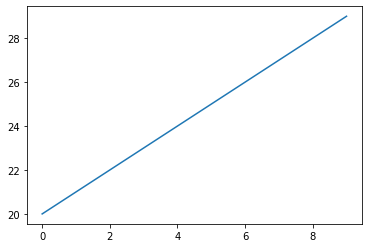

In [ ]:
# Plot a list of numbers as a line.
numbers = range(20, 30)
plt.plot(numbers)  # What's used as the x axis if only y axis values are given?
plt.show()  # Show plot.

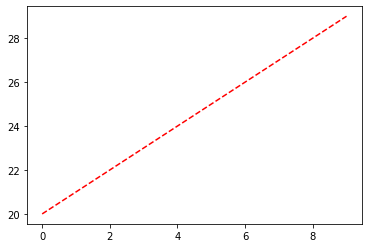

In [ ]:
# Second parameter controls style. 'r' changes the line colour to red,
# and '--' is the style of the line.
plt.plot(numbers, 'r--')
plt.show()

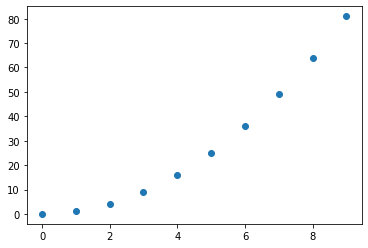

In [ ]:
# Plot a list of numbers as a scatter plot.
x = range(10)
y = [v ** 2 for v in x]
plt.scatter(x, y)
plt.show()

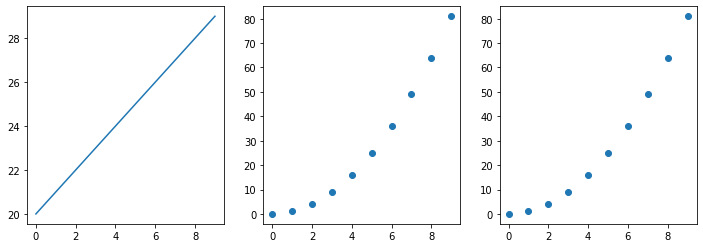

In [ ]:
# Present plots side by side
fig, axes = plt.subplots(nrows=1, ncols=3)

# Set figure size.
fig.set_size_inches(w=12, h=4)

axes[0].plot(numbers)
axes[1].scatter(x, y)
axes[2].scatter(x, y)
plt.show()

Examine what the list of axes looked like in this case:

In [ ]:
print(axes)

Let's try making a bar plot, labelling our axes, and writing a plot title:

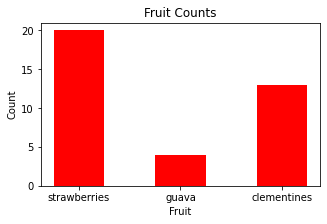

In [ ]:
# Creating the dataset.
data = {'strawberries': 20,
        'guava': 4,
        'clementines': 13}
fruits = list(data.keys())
counts = list(data.values())

fig = plt.figure(figsize=(5, 3))

# Plot the bar plot.
plt.bar(fruits, counts, color='red', width=0.5)

plt.xlabel("Fruit")
plt.ylabel("Count")
plt.title("Fruit Counts")
plt.show()

#### Bokeh

Bokeh is another visualisation library available in Python. Bokeh makes it easy to create **interactive visualisations**. From the [Bokeh docs](https://docs.bokeh.org/en/latest/index.html):
> Bokeh is a Python library for creating interactive visualisations for modern web browsers. It helps you build beautiful graphics, ranging from simple plots to complex dashboards with streaming datasets. With Bokeh, you can create JavaScript-powered visualisations without writing any JavaScript yourself.

Below are some plot examples using Bokeh. For more detailed examples, check this [interactive tutorial](https://mybinder.org/v2/gh/bokeh/bokeh-notebooks/master?filepath=tutorial%2F00%20-%20Introduction%20and%20Setup.ipynb).

In [ ]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

# The text below is from the Bokeh tutorial:
# We are in a Jupyter notebook, so we will call `output_notebook()`.
# We only need to call this once, and all subsequent calls to `show()` will
# display inline in the notebook.
output_notebook()

Let's start again by making a simple line plot:

In [ ]:
# Plot numbers as a line.
numbers = range(10)

p = figure()
p.line(x=numbers, y=numbers)
show(p)

Notice that you can already interact with this plot by panning, zooming, saving, etc. (check out the row tools on the upper right hand side).

The default figure size is a bit large, so let's shrink this down. We can also customise the line plot to be a red dashed line:

In [ ]:
# Plot numbers as a line.
numbers = range(10)

p = figure(plot_width=300, plot_height=300)
p.line(x=numbers, y=numbers, line_color='red', line_dash='dashed')
show(p)

Remaking our scatter plot:

In [ ]:
# Plot a list of numbers as a scatter plot.
x = range(10)
y = [v ** 2 for v in x]

p = figure(plot_width=300, plot_height=300)
p.scatter(x=x, y=y)
show(p)

In [ ]:
# Present plots side by side.
from bokeh.layouts import row

# Create plots.
f1 = figure(plot_width=300, plot_height=300)
f1.line(numbers, numbers)

f2 = figure(plot_width=300, plot_height=300)
f2.scatter(x, y)

f3 = figure(plot_width=300, plot_height=300)
f3.scatter(x, y, color='red')

# Put the results in a row and show the figure.
show(row(f1, f2, f3))

**Exercise**: Can you figure out how to remake the fruit bar plot from above in Bokeh?



# Part II: Introduction to NumPy





[NumPy](https://numpy.org/) is a high-performance Python library that enables us to work with multidimensional arrays. We care about arrays as they are the core building blocks of Deep Learning (DL), and indeed machine learning in general. 

Specific DL frameworks, such as JAX, TensorFlow, and PyTorch enable us to write models that heavily rely on array computing, with the added benefit of additional dedicated hardware acceleration (for example, JAX makes it easy to write code for training and evaluating models on multiple GPUs or TPUs).

Still, despite the existence of these DL frameworks, NumPy is often used both for quick experimentation and small data processing. NumPy has also been a great source of influence on DL frameworks – you will often find same-named and same-behaving functions across NumPy and various DL frameworks.

Links:
- [Installing NumPy](https://numpy.org/install/)
- [NumPy documentation](https://numpy.org/doc/stable/contents.html)
- [NumPy for MATLAB users](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html)

### Import NumPy

This is how we import NumPy in Python programmes:


In [ ]:
import numpy as np

### NumPy arrays and their creation

In general, **arrays** are multidimensional "tables" of values of the same type. Arrays are described by their **rank** (the number of dimensions) and their **shape** (the size of each of the array dimensions). Often, we call each dimension an **axis**.

We use specific words to denote arrays of different dimensions:

- **scalar** (single number) -- rank 0 (0-dimensional) array
- **vector** (sequence of numbers) -- rank 1 array
- **matrix** (rectangular table of values) -- rank 2 array
- **tensor** -- rank 3 (and above) array, but can also refer to any rank arrays. So, we could say that a vector is a tensor, and an 8-dimensional array is a tensor.

![picture](https://storage.googleapis.com/dm-educational/assets/intro-to-python-and-numpy/arrays.svg)



Let's create some NumPy arrays, starting with a scalar:

In [ ]:
# Creating a scalar.
a = np.array(1)  # A rank 0 array is simply a scalar.
print(a)

1


We can create arrays from (potentially nested) lists of numbers:

In [ ]:
b = np.array([1, 2, 3, 4])  # Vector.
print(b)

[1 2 3 4]


In [ ]:
c = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])  # Matrix.
print(c)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Accessing specific values within the numpy array works using indexing in the same way as described above for native Python lists:

In [ ]:
c[1, 0]

5

In [ ]:
c[:, 2]

array([ 3,  7, 11])

In [ ]:
c[0:2, -1]

array([4, 8])

In [ ]:
# Rank 3 tensor.
d = np.array([[[1, 2, 3, 4],
               [5, 6, 7, 8],
               [9, 10, 11, 12]],
              [[13, 14, 15, 16],
               [17, 18, 19, 20],
               [21, 22, 23, 24]]])
print(d)

[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]]


#### Array size and type

We mentioned that array sizes are characterised by the rank and the shape of the array.
A rank is just a number, denoting the number of dimensions (axes), whereas the shape is a tuple of integers representing the size of each of the axes:

In [ ]:
a = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])
print(a, '\n')

print('Rank:', np.ndim(a))    # Rank.
print('Shape:', np.shape(a))  # Shape.

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] 

Rank: 2
Shape: (3, 4)


We also mentioned that arrays contain values of the *same type*. We can get that type by calling the `dtype` property:

In [ ]:
print('Type of variable a:', type(a))       # Type of the variable a.
print('Type of values in the array:', a.dtype)  # Type of the array element.

Type of variable a: <class 'numpy.ndarray'>
Type of values in the array: int64


Since NumPy arrays contain elements of the same type, when creating an array, NumPy will try to guess the [data type](https://numpy.org/devdocs/user/basics.types.html), unless you specify the data type manually:

In [ ]:
a = np.array([1, 2, 3])
print(a)
print('Data type:', a.dtype)

[1 2 3]
Data type: int64


In [ ]:
a = np.array([1.0, 2.0, 3.0])
print(a)
print('Data type:', a.dtype)

[1. 2. 3.]
Data type: float64


We can manually set the data type:

In [ ]:
a = np.array([1, 2, 3], dtype=np.float32)
print(a)
print('Data type:', a.dtype)

[1. 2. 3.]
Data type: float32


In the following case, NumPy will guess that the input should be `float` in order to not lose precision:


In [ ]:
a = np.array([1, 2, 3.1])
print(a)
print('Data type:', a.dtype)

[1.  2.  3.1]
Data type: float64


Be careful when specifying the data type manually, especially when creating integers from floats:

In [ ]:
# Be careful with casting the data type – you may lose precision.
a = np.array([1.0, 2.0, 3.1], dtype=np.int32)
print(a)
print('Data type:', a.dtype)

[1 2 3]
Data type: int32


Notice that the `3.1` is now `3` - that's precision loss.

#### Useful creation functions

NumPy supports many convenient ways of [creating arrays](https://numpy.org/doc/stable/user/basics.creation.html). Here are a few that you are likely to frequently encounter:

In [ ]:
a = np.zeros((2, 3))  # Array of zeros of shape (2, 3).
print(a)

[[0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
b = np.ones((1, 2))  # Array of ones of shape (1, 2).
print(b)

[[1. 1.]]


In [ ]:
c = np.eye(5)  # Identity matrix of shape (5, 5).
print(c)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [ ]:
# Array of random values from [0, 1] of shape (2, 2).
d = np.random.random((2, 2))
print(d)

[[0.14588963 0.19837327]
 [0.23629504 0.54878177]]


In [ ]:
e = np.arange(10)  # Array of length 10, containing numbers 0 to 9.
print(e)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
f = np.full((3, 3), 3)  # Array of shape (3, 4) containing the number 3.
print(f)

[[3 3 3]
 [3 3 3]
 [3 3 3]]


You can also create arrays of zeros and ones of the same shape as other arrays:

In [ ]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])
print(np.ones_like(a), '\n')

print(np.zeros_like(a))

[[1 1 1]
 [1 1 1]] 

[[0 0 0]
 [0 0 0]]


We can also create arrays of random numbers. Random numbers are implemented as [pseudo-random](https://www.random.org/randomness/), and as such require a starting number for generation called a [seed](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html). Given that a lot of deep learning research relies on (pseudo-)random numbers, as good experimental practice it is important to fix the random seed as that makes our experiments [reproducible](https://blog.ml.cmu.edu/2020/08/31/5-reproducibility/). If you don't explicitly set the seed, it will be set to a platform-dependent source of seed which is often the current time in milliseconds.

In [ ]:
np.random.seed(42)  # Setting the random seed.
d = np.random.random([2, 2])  # Calling numpy random "uses up" the random seed.
print(d, '\n')

d = np.random.random([2, 2])  # This will produce different numbers!
print(d)

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]] 

[[0.15601864 0.15599452]
 [0.05808361 0.86617615]]


In [ ]:
np.random.seed(42)  # Setting the random seed.
d = np.random.random([2, 2])
print(d, '\n')

np.random.seed(42)  # Setting the random seed again.
d = np.random.random([2, 2])
print(d)

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]] 

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]]


### Slicing and indexing

[Slicing and indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html) in NumPy is very similar to slicing and indexing in Python, with the major differences being the syntax of indexing/slicing, and the support for boolean array indexing.

#### NumPy slicing and indexing syntax

In Python, indexing of nested lists is written in the form of 
`lists[x][y][z][...]`.

In NumPy, on the other hand, indexing is written in the form of `array[x, y, z, ...]`, where `x` specifies the number of a row (axis 0), `y` the number of a column (axis 1), and `z` and other numbers specify the number of other axes (axis 2 and more) of the array `array`.

By indexing a numpy array, we obtain a result of a lower rank. For example, taking the 1st row of a 2x2 matrix results in a vector of size 2 (one rank less).

Let's now re-do some of the exercises from the Python indexing & slicing, showing a few more NumPy extras:

In [ ]:
a = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])

print(a[1, 1])          # element in 2nd row and 2nd column

6


In [ ]:
print(a[1], '\n')       # 2nd row

print(a[1, :], '\n')    # the same as above (colon = full slice)

print(a[1, ...])        # the same as above (ellipsis extends slicing with colons for all remaining dimensions)

[5 6 7 8] 

[5 6 7 8] 

[5 6 7 8]


In [ ]:
print(a[1, 1:], '\n')   # elements in 2nd row, from 2nd column until the end

print(a[1, :-1], '\n')  # elements in 2nd row, until the last column (not inclusive)

print(a[1, 1:2], '\n')  # elements in 2nd row, from 2nd until 3rd element (not inclusive)

[6 7 8] 

[5 6 7] 

[6] 



As in Python, we can use array indexing and slicing for array modification too:

In [ ]:
a = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])
print('Before the modification:', a, '\n')

a[0, 0] = 100
print('After the modification:', a)

Before the modification: [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] 

After the modification: [[100   2   3   4]
 [  5   6   7   8]
 [  9  10  11  12]]


We can also modify entire rows/columns/regions of arrays:

In [ ]:
a = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])
print(a, '\n')

a[:, 1] = 100
print('After the modification:', a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] 

After the modification: [[  1 100   3   4]
 [  5 100   7   8]
 [  9 100  11  12]]


#### Boolean array indexing

Boolean array indexing is very handy when working with NumPy arrays: effectively, each element of the boolean array is used to either select or drop the corresponding element in the array being indexed. This is often used in conjunction with conditions - conditions on arrays return a boolean valued array.

For example:

In [ ]:
a = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])
print(a)
print('Boolean array:')
# Boolean array, same shape as a, where each element corresponds to
# whether the corresponding element in a meets the condition of being > 3.
print(a > 3)  

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Boolean array:
[[False False False  True]
 [ True  True  True  True]
 [ True  True  True  True]]


In [ ]:
bool_index = a > 3
print(a[bool_index])
print(a[a > 3])  # Shorthand.

[ 4  5  6  7  8  9 10 11 12]
[ 4  5  6  7  8  9 10 11 12]


### Array operations and vectorisation

NumPy contains a large set of familiar mathematical functions such as addition, subtraction, multiplication and division, square root, powers, and trigonometric functions. All these NumPy functions are **vectorised**, in that they operate elementwise – each operation is applied on each element of the array (or two corresponding elements in the case of binary operations).

Here is an example of vectorised addition:

In [ ]:
a = np.arange(5, dtype=np.int32)
b = np.ones(5, dtype=np.int32)
print('a:\t\t', a)
print('b:\t\t', b)

print('np.add(a, b):\t', np.add(a, b))
print('a + b:\t\t', a + b)  # Shorthand via operator overloading.

a:		 [0 1 2 3 4]
b:		 [1 1 1 1 1]
np.add(a, b):	 [1 2 3 4 5]
a + b:		 [1 2 3 4 5]


Subtraction:

In [ ]:
print(np.subtract(a, b))
print(a - b)

[-1  0  1  2  3]
[-1  0  1  2  3]


Note that `*` is an elementwise multiplication (also called a [Hadamard product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices))) and not a matrix multiplication!

In [ ]:
print(np.multiply(a, b))
print(a * b)

[0 1 2 3 4]
[0 1 2 3 4]


Division:

In [ ]:
c = b + b
print(np.divide(a, c))
print(a / c)

[0.  0.5 1.  1.5 2. ]
[0.  0.5 1.  1.5 2. ]


Similarly, comparison operators are also elementwise operations:

In [ ]:
print(a == b)
print(a > b)

[False  True False False False]
[False False  True  True  True]


In [ ]:
# Remember boolean-based indexing!
print(a[a == b])
print(a[a > b])

[1]
[2 3 4]


#### Aggregations

NumPy also contains functions that compute values over the whole array or subsets of arrays. We call these functions **aggregation functions**.

In [ ]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])
print(a.shape)

(2, 3)


In [ ]:
print(f'Sum of all elements:\n{np.sum(a)}\n')

print(f'Sum over rows (first axis):\n{np.sum(a, axis=0)}\n')

print(f'Sum over columns (second axis):\n{np.sum(a, axis=1)}\n')

print(f'Sum over the first and second axis:\n{np.sum(a, axis=(0, 1))}')

Sum of all elements:
21

Sum over rows (first axis):
[5 7 9]

Sum over columns (second axis):
[ 6 15]

Sum over the first and second axis:
21


Multiplication examples:

In [ ]:
print(f'Multiply all elements:\n{np.prod(a)}\n')

print(f'Multiply over rows (first axis):\n{np.prod(a, axis=0)}')

Multiply all elements:
720

Multiply over rows (first axis):
[ 4 10 18]


Min and max:

In [ ]:
print(f'Minimum of all elements:\n{np.min(a)}\n')

print(f'Minimum over rows (first axis):\n{np.min(a, axis=0)}')

Minimum of all elements:
1

Minimum over rows (first axis):
[1 2 3]


In [ ]:
print(f'Maximum of all elements:\n{np.max(a)}\n')

print(f'Maximum over rows (first axis):\n{np.max(a, axis=0)}')

Maximum of all elements:
6

Maximum over rows (first axis):
[4 5 6]


Mean:

In [ ]:
print(f'Mean of all elements:\n{np.mean(a)}\n')

print(f'Mean over rows (first axis):\n{np.mean(a, axis=0)}')

Mean of all elements:
3.5

Mean over rows (first axis):
[2.5 3.5 4.5]


Standard deviation:

In [ ]:
print(f'Std of all elements:\n{np.std(a)}\n')

print(f'Std over rows (first axis):\n{np.std(a, axis=0)}')

Std of all elements:
1.707825127659933

Std over rows (first axis):
[1.5 1.5 1.5]


#### Linear algebra

NumPy supports a large amount of linear algebra routines. Here, we will introduce the dot product, matrix multiplication, and einstein summation.

If you would like to learn more about linear algebra, we recommend [this MIT course](https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/video-lectures/).

 Let's start by defining some matrices:

In [ ]:
a = np.array([[1, 2],
              [3, 4]])
b = np.array([[5, 6],
              [7, 8]])
print(a.shape)
print(b.shape)

(2, 2)
(2, 2)


In [ ]:
v = np.array([[1, 0]])
w = np.array([[2], [3]])
print(v.shape)
print(w.shape)

(1, 2)
(2, 1)


Let's do the following matrix-vector multiplication $\begin{pmatrix}
  1 & 2  \\
  3 & 4  \\
 \end{pmatrix}  \begin{pmatrix}
  2  \\
  3  \\
 \end{pmatrix}
$:

In [ ]:
print(a.shape, w.shape, '\n')

print(np.dot(a, w))

(2, 2) (2, 1) 

[[ 8]
 [18]]


This is how we do the following dot product $\begin{pmatrix}
  1 & 0  \\
 \end{pmatrix}  \begin{pmatrix}
  2  \\
  3  \\
 \end{pmatrix}
$:

In [ ]:
print(v.shape, w.shape)
print(np.dot(v, w))

(1, 2) (2, 1)
[[2]]


and we can use `np.matmul` to do this matrix-matrix multiplication $\begin{pmatrix}
  1 & 2  \\
  3 & 4  \\
 \end{pmatrix}  \begin{pmatrix}
  5 & 6  \\
  7 & 8  \\
 \end{pmatrix}
$:

In [ ]:
print(a.shape, b.shape)
print(np.matmul(a, b))

(2, 2) (2, 2)
[[19 22]
 [43 50]]


In [ ]:
print(a @ b)  # @ is shorthand for matmul.

[[19 22]
 [43 50]]


As in linear algebra, this operation $\begin{pmatrix}
  1 & 2  \\
  3 & 4  \\
 \end{pmatrix}  \begin{pmatrix}
  1 & 0  \\
 \end{pmatrix}
$ is invalid because the inner dimensions of the matrix and the vector do not agree and will raise a `ValueError`:

In [ ]:
print(a.shape, v.shape)
# Inner dimensions of the two matrices must match, as per the requirement
# of the dot product / matrix multiplication.
print(np.matmul(a, v))
# ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0,
# with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 2)

(2, 2) (1, 2)


ValueError: ignored

#### Einsum notation

If there is one piece of NumPy functionality you should master, it is **Einsum notation**. Since this will be a quick introduction, you might not get all the bits and bobs relating to it, so we highly recommend you check some of the links below.

The [Einstein summation (notation)](https://en.wikipedia.org/wiki/Einstein_notation) is a convenient way to represent operations over a set of arrays simply by indicating the input and output indices.

For example:
`np.einsum('ij,jk->ik', a, b)` is the einsum notation for matrix multiplication between matrices `a` and `b`. The crucial bit is in the `ij,jk->ik` notation which does the following:
- Everything before the `->` symbol represents the indices of the input, and everything after represents the indices of the resulting output.
- Repeating indices in the input (e.g `j`) denote that the values along those axes will be multiplied together.
- Missing indices in the output (again `j`) denote that values along that axes will be summed.

Let's now draw a parallel between `ij,jk->ik` and the mathematical notation that it seeks to simplify:
<center>
$result_{ik} = \sum_j A_{ij} B_{jk}$
</center>
We can see that:
- The elements on the right hand side of the expression will be multiplied by iterating over the shared index `j`
- We're summing over the index `j`, and since that index is missing on the left hand side, we can omit the summation and abbreviate the notation like this:
<center>
$result_{ik} = A_{ij} B_{jk}$
</center>
Now we have a direct relationship between the mathematical notation and the operation string `ij,jk->ik`!

Let's see what we can do with einsum next...

In [ ]:
a = np.array([[1, 2],
              [3, 4]])
b = np.array([[5, 6],
              [7, 8]])

v = np.array([[1, 0]])
w = np.array([[2], [3]])

In [ ]:
print(a, '\n')

print(b, '\n')

print('Matrix multiplication:')
print(np.einsum('ij,jk->ik', a, b))  # Equivalent to np.matmul(a, b).

[[1 2]
 [3 4]] 

[[5 6]
 [7 8]] 

Matrix multiplication:
[[19 22]
 [43 50]]


We can easily do transposition with einsum too, as:

<center>
$result_{ij} = A_{ji}$
</center>

In [ ]:
print(a, '\n')

print(b, '\n')

print('Transposition:')
print(np.einsum('ij->ji', a))  # Transposition.

[[1 2]
 [3 4]] 

[[5 6]
 [7 8]] 

Transposition:
[[1 3]
 [2 4]]


Summing over the columns is one index away:
<center>
$result_{j} = \sum_{i} A_{ij}$
</center>

In [ ]:
print(np.einsum('ij->j', a))  # Row sum.

[4 6]


We can also sum over the whole matrix:
<center>
$result = \sum_{i} \sum_{j} A_{ij}$
</center>

In [ ]:
print(np.einsum('ij->', a))  # Sum over all axes.

10


Elementwise multiplication:
<center>
$result_{ij} = A_{ij} * B_{ij}$
</center>

In [ ]:
print(np.einsum('ij,ij->ij', a, b))  # Sum over all axes.

[[ 5 12]
 [21 32]]


We can also do operations with multiple arrays/tensors at the same time:
<center>
$result_{ij} = \sum_{j} \sum_{k} A_{ij} * B_{jk} * C_{kl}$
</center>

In [ ]:
c = np.eye(2, dtype=np.int32)

print(np.einsum('ij,jk,kl->il', a, b, c))

[[19 22]
 [43 50]]


Additional einsum resources:
- https://ajcr.net/Basic-guide-to-einsum/
- https://rockt.github.io/2018/04/30/einsum
- https://obilaniu6266h16.wordpress.com/2016/02/04/einstein-summation-in-numpy/


### Broadcasting

**Broadcasting** is the mechanism that enables using arrays of different shapes during binary arithmetic operations.
What broadcasting does can be thought of as repeating a smaller array so that it fits the size of the larger array, thereby making their shapes compatible.
Broadcasting is at the essence of vectorising array operations and it makes certain operations much more efficient because it does not copy data.

Broadcasting is easiest to understand visually. In each case below (each row is a separate case), see if you can follow along how NumPy will "repeat" the smaller array on the right to make it "fit" with the larger array on the left:

![picture](https://storage.googleapis.com/dm-educational/assets/intro-to-python-and-numpy/broadcasting.svg)

Note also that a `ValueError` will be thrown if it's not possible to make broadcasting work.



Concretely, broadcasting works like this:
- NumPy compares shapes of two arrays elementwise
- if their shapes are of different sizes, prepend ones to the shape of the shorter array until they're the same size
- start the comparison with the trailing (rightmost, last) axis, and works towards the leading (leftmost, first) axis
- the dimensions are compatible when:
  - they are equal
  - one of them equals 1
- if there's a mismatch, an exception is thrown

Let's see this on an example:

Let's check the examples from above:

In [ ]:
a = np.array([[1, 2, 3, 4]])
b = np.array([1])
print(a + b)

[[2 3 4 5]]


In [ ]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
b = np.array([1, 2, 3, 4])
print(a + b)

[[ 2  4  6  8]
 [ 6  8 10 12]]


In [ ]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
b = np.array([[1], [2]])
print(a + b)

[[ 2  3  4  5]
 [ 7  8  9 10]]


In [ ]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
b = np.array([[1, 2]])
# ValueError: operands could not be broadcast together with shapes (2,4) (1,2).
print(a + b)

ValueError: ignored

Broadcasting is efficient and often used. However, you need to be careful with your tensor sizes – broadcasting can be a source of difficult-to-detect bugs in your code in the case where you don't want the broadcast to be done, but because of the compatible tensor sizes, it will still be executed.

For example, if you erroneously removed the leading axis of a tensor, broadcasting will still work when operating to the original tensor because of the shape compatibility – the leading dimension will simply be repeated). You can guard against such errors by using **defensive programming**, which can involve frequently checking that your tensors are the shape you expect them to be.

Some further resources on broadcasting:
- [NumPy docs](https://numpy.org/doc/stable/user/basics.broadcasting.html)
- [SciPy docs](http://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html)


### Array manipulation

NumPy supports a large array of array manipulation functions. Here, we focus on a small number of them that are frequently used in deep learning.

#### Shape changers

Shape changing functions change the shape of the array without changing the underlying data.

`np.reshape` will reshape the existing data. The result will be the same data with the new shape. Note that the old shape and the new requested shape need to be compatible – they must contain the same number of elements across the old and the new shape):

In [ ]:
a = np.arange(12)
print(a)
print('Shape:', a.shape, '\n')

b = np.reshape(a, [3, 4])
print(b)
print('Shape:', b.shape, '\n')
c = np.reshape(a, [2, 6])  # Gives a new shape to the data.

print(c)
print('Shape:', c.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
Shape: (12,) 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Shape: (3, 4) 

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
Shape: (2, 6)


For example, the following won't work because the old and the new shapes do not agree:


In [ ]:
print('Shape:', b.shape)
# ValueError: cannot reshape array of size 12 into shape (2,7)
print(np.reshape(a, [2, 7]))

Shape: (3, 4)


ValueError: ignored

`np.transpose` does transposition on vectors and matrices:

In [ ]:
c = np.transpose(b)  # Permutes the axes of the data.
print(b)
print('Shape:', b.shape, '\n')

print(c)
print('Shape:', c.shape)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Shape: (3, 4) 

[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]
Shape: (4, 3)


`np.expand_dims` expands the number of dimensions (axes) by creating a new dimension of size `1`:

In [ ]:
print(a)
print('Shape:', a.shape, '\n')

d = np.expand_dims(a, axis=0)   # Expand the number of axes.
print(d)
print('Shape:', d.shape, '\n')

e = np.expand_dims(a, axis=-1)  # Expand the number of axes.
print(e)
print('Shape:', e.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
Shape: (12,) 

[[ 0  1  2  3  4  5  6  7  8  9 10 11]]
Shape: (1, 12) 

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]
Shape: (12, 1)


`np.squeeze` removes any axes of size `1`:

In [ ]:
print(e)
print('Shape:', e.shape, '\n')
f = np.squeeze(e)     # remove axes of size 1

print(f)
print('Shape:', f.shape)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]
Shape: (12, 1) 

[ 0  1  2  3  4  5  6  7  8  9 10 11]
Shape: (12,)


#### Joining and splitting

Often it is useful to join multiple vectors/matrices/tensors into a bigger one, or to split a bigger one into smaller ones. For this, we use joining and splitting functions:

In [ ]:
a = np.zeros([3, 2], dtype=np.int32)
b = np.ones([3, 2], dtype=np.int32)
print(a, '\n')

print(b)

[[0 0]
 [0 0]
 [0 0]] 

[[1 1]
 [1 1]
 [1 1]]


`np.concatenate` will concatenate along an existing axis. Depending on which axes we concatenate along, we will get a different result:

In [ ]:
c = np.concatenate([a, b], axis=0)
print(c)
print('\nShape:', c.shape)

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]

Shape: (6, 2)


In [ ]:
d = np.concatenate([a, b], axis=1)
print(d)
print('\nShape:', d.shape)

[[0 0 1 1]
 [0 0 1 1]
 [0 0 1 1]]

Shape: (3, 4)


`np.stack`, on the other hand, will stack our matrices along a new axis – it will create a tensor with a rank larger by 1, which contains our matrices as slices:

In [ ]:
e = np.stack([a, b], axis=0)
print(e)
print('\nShape:', e.shape)

[[[0 0]
  [0 0]
  [0 0]]

 [[1 1]
  [1 1]
  [1 1]]]

Shape: (2, 3, 2)


Let's slice the new tensor `e` tp check where the matrix `a` is:

In [ ]:
e[0]

array([[0, 0],
       [0, 0],
       [0, 0]], dtype=int32)

This is equivalent to:

In [ ]:
e[0, :, :]

array([[0, 0],
       [0, 0],
       [0, 0]], dtype=int32)

And we can find the matrix `b` at index 1:

In [ ]:
e[1]

array([[1, 1],
       [1, 1],
       [1, 1]], dtype=int32)

`np.split` splits an array into subarrays.

If we pass an integer `n` to `np.split`, it will try to split the axis into `n` equal parts:

In [ ]:
a = np.arange(10)
print('Input:', a)
print('\nSplit into 2 parts along the first axis:')
split_res = np.split(a, 2, axis=0)
for elem in split_res:
  print(elem)

print('\nSplit into 5 parts along the first axis:')
split_res = np.split(a, 5, axis=0)
for elem in split_res:
  print(elem)

Input: [0 1 2 3 4 5 6 7 8 9]

Split into 2 parts along the first axis:
[0 1 2 3 4]
[5 6 7 8 9]

Split into 5 parts along the first axis:
[0 1]
[2 3]
[4 5]
[6 7]
[8 9]


If we pass `np.split` an array/list instead of a number of parts, it will split the NumPy array `a` in a way that each element of the array signifies a splitting point, e.g.:

In [ ]:
print('Input:', a)
print('\nSplit array into 4 parts using the split point indices [1, 5, 8] '
      'along the first axis:')
split_res = np.split(a, [1, 5, 8], axis=0)
for elem in split_res:
  print(elem)

Input: [0 1 2 3 4 5 6 7 8 9]

Split array into 4 parts using the split point indices [1, 5, 8] along the first axis:
[0]
[1 2 3 4]
[5 6 7]
[8 9]


#### Tiling

Sometimes it is useful to be able to repeat the same array multiple times. This is reminiscent of broadcasting, but do not use tiling for broadcasting because broadcasting is simply more efficient.

`np.tile` repeats a given array. The second argument to `np.tile` can simply be a number:

In [ ]:
a = np.array([[0, 1, 2],
              [3, 4, 5]])
print(a)
print('\nTiled array:\n', np.tile(a, 2))

[[0 1 2]
 [3 4 5]]

Tiled array:
 [[0 1 2 0 1 2]
 [3 4 5 3 4 5]]


or a list/tuple/array which defines repetition per dimension:

In [ ]:
print(a)
# Repeat 3 times in the row dimension, and twice in the column dimension.
print('\nTiled array:\n', np.tile(a, (3, 2)))

[[0 1 2]
 [3 4 5]]

Tiled array:
 [[0 1 2 0 1 2]
 [3 4 5 3 4 5]
 [0 1 2 0 1 2]
 [3 4 5 3 4 5]
 [0 1 2 0 1 2]
 [3 4 5 3 4 5]]


`np.repeat` repeats an array on a particular axis:

In [ ]:
print(a)
print('\nTiled array:\n', np.repeat(a, 2, axis=0))

[[0 1 2]
 [3 4 5]]

Tiled array:
 [[0 1 2]
 [0 1 2]
 [3 4 5]
 [3 4 5]]


In [ ]:
print(a)
print('\nTiled array:\n', np.repeat(a, 2, axis=1))

[[0 1 2]
 [3 4 5]]

Tiled array:
 [[0 0 1 1 2 2]
 [3 3 4 4 5 5]]


### Other

NumPy contains a plethora of useful functions. We enumerate some of the more often used functions here:

`np.argmax` or argument of the maximum are the indices of the maximum value (optionally along an axis):

In [ ]:
a = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 0, 1, 2]])
print(a)
print('\nArgmax along axis=0:', np.argmax(a, axis=0))
print('\nArgmax along axis=1:', np.argmax(a, axis=1))

[[1 2 3 4]
 [5 6 7 8]
 [9 0 1 2]]

Argmax along axis=0: [2 1 1 1]

Argmax along axis=1: [3 3 0]


Interestingly, if we run `np.argmax` on an array of rank > 2, we might expect rank-dimensional indices (e.g. we might expect 2 indices for a matrix). However, we get an index of the flattened version of the array:

In [ ]:
print(np.argmax(a))   # We might expect [2, 0] as a result, but alas, no such luck!

8


But then we can use `np.unravel_index` to get the indices in the original matrix:

In [ ]:
print(np.unravel_index(np.argmax(a), a.shape))

(2, 0)


`np.where`, based on the condition, returns elements of either one or the other of its array arguments:

In [ ]:
a = np.reshape(np.arange(9), (3, 3))
b = np.zeros_like(a)
print('a:\n', a)
print('b:\n', b)
print('\nResult of the `np.where`:')
print(np.where(a % 2 == 0, a, b))  # All odd elements of `a` get zeroed-out.

a:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
b:
 [[0 0 0]
 [0 0 0]
 [0 0 0]]

Result of the `np.where`:
[[0 0 2]
 [0 4 0]
 [6 0 8]]


### Suggested exercises

- Can you reproduce the result of a `np.full` by using `np.ones`? Hint: broadcasting to the rescue?
- Can you reproduce the result of `np.zeros_like` by using `np.zeros`? Hint: how would you provide the size information?
- What is the difference between `a[1, 1:2]`, `a[1, [1]]` and `a[1, 1]`?
- Can you create a matrix containing the integers 0 to 11 of the shape (4, 3) and (6, 2), starting from array creation using `np.arange`?
- Can you count the total number of elements in an array by using some of the aggregation functions? Hint: try using the shape information, or `np.ones_like`.
- Do the outer product of two vectors by calling `np.outer` and by broadcasting!
- Do a bilinear product $a^T W b$ with einsum, where $a$ and $b$ are vectors, and $W$ is an appropriately shaped matrix.

Whew, thanks for sticking with us until the end of this tutorial!

This tutorial was inspired by the [Introduction to Numpy tutorial](https://github.com/eemlcommunity/PracticalSessions2019/blob/master/introductory/Intro_Numpy.ipynb) from EEML, and all the other fantastic resources referenced within this colab! :)

